In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abubakar\Anaconda3\envs\tfde

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
from keras.models import Sequential

Using TensorFlow backend.


In [7]:
from keras.layers import Dense

In [8]:
dataset=pd.read_csv('C:/Users/Abubakar/Desktop/Desktop Docs/Datasets/housepricedata.csv ')

In [9]:
dataset.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [10]:
import seaborn as sns
%matplotlib inline
dataset=dataset.iloc[:1460]

In [11]:
dataset.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [12]:
cols =['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice']

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


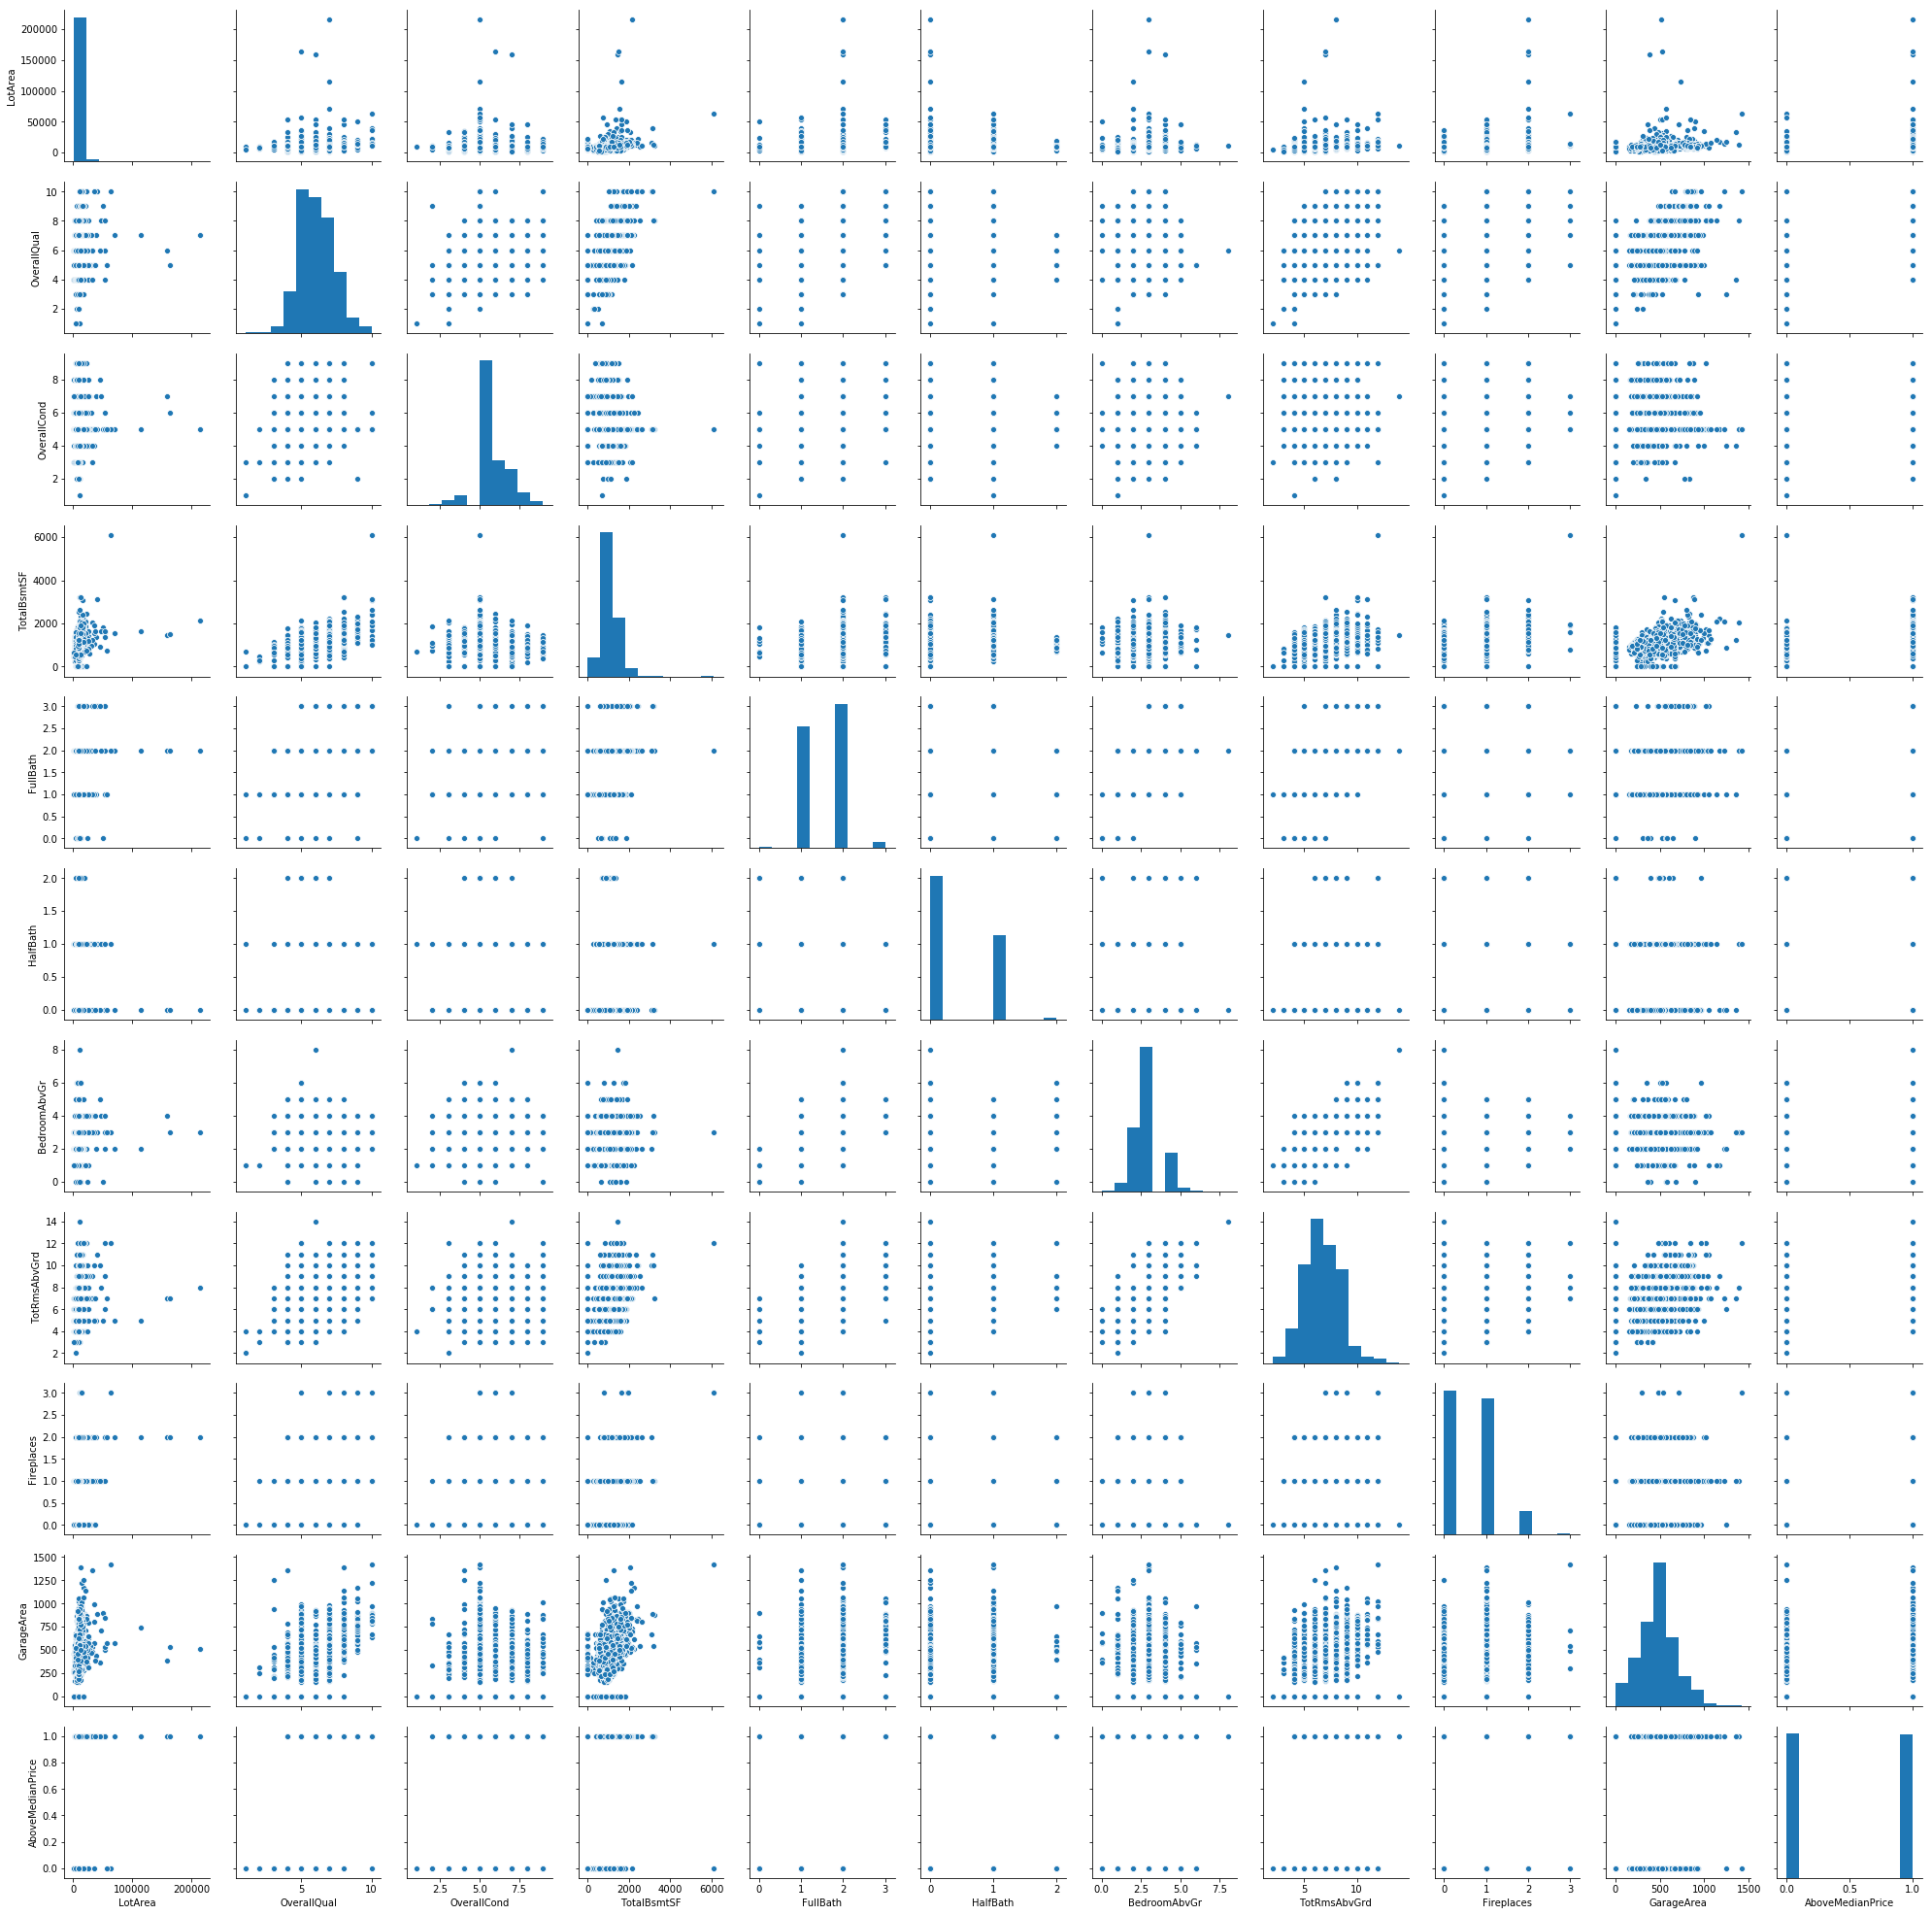

In [13]:
sns.pairplot(dataset[cols], size = 2.5)

In [22]:
X=dataset.iloc[:,0:10]

In [23]:
X=X.values

In [24]:
Y=dataset.iloc[:,10]

In [25]:
Y=Y.values

In [26]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [27]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [35]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.36)

In [36]:
X_test.shape

(158, 10)

In [37]:
X_train.shape

(1022, 10)

In [38]:
Y_test.shape

(158,)

In [39]:
Y_train.shape

(1022,)

In [40]:
model=Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [41]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [42]:
histo= model.fit(X_train, Y_train,
          batch_size=20, epochs=100,
              validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 280 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.6816 - acc: 0.5098 - val_loss: 0.6744 - val_acc: 0.5286
Epoch 2/100
1022/1022 [==============================] - 0s 71us/step - loss: 0.6722 - acc: 0.5137 - val_loss: 0.6648 - val_acc: 0.5321
Epoch 3/100
1022/1022 [==============================] - 0s 67us/step - loss: 0.6624 - acc: 0.5431 - val_loss: 0.6554 - val_acc: 0.5643
Epoch 4/100
1022/1022 [==============================] - 0s 81us/step - loss: 0.6523 - acc: 0.6018 - val_loss: 0.6461 - val_acc: 0.6893
Epoch 5/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.6420 - acc: 0.6986 - val_loss: 0.6365 - val_acc: 0.7250
Epoch 6/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.6307 - acc: 0.7427 - val_loss: 0.6264 - val_acc: 0.7893
Epoch 7/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.6191 - acc: 0.7935 - val_loss: 0.6156 - val_acc: 0.7929
Ep